In [2]:
import json  #create the json
import shutil #copy images to train, test and valid dirs
import os #files and dirs manipulation
import math #split calculate

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
parent_dir = '/content/gdrive/MyDrive/Studio 3A/SnakeDataset'

In [5]:
database_dir = '/content/gdrive/MyDrive/Studio 3A/SnakeDataset/dataset'
#show category folder list
os.chdir(database_dir)
category_list = list(filter(lambda x: os.path.isdir(x),os.listdir()))
for category in category_list:
  print(category)

storeria-dekayi
rhinocheilus-lecontei
thamnophis-proximus
thamnophis-elegans
thamnophis-marcianus
pituophis-catenifer
thamnophis-radix
pantherophis-vulpinus
storeria-occipitomaculata
thamnophis-sirtalis
nerodia-erythrogaster
pantherophis-spiloides
pantherophis-obsoletus
opheodrys-aestivus
pantherophis-guttatus
nerodia-sipedon
pantherophis-alleghaniensis
nerodia-rhombifer
pantherophis-emoryi
nerodia-fasciata
heterodon-platirhinos
lampropeltis-triangulum
crotalus-ruber
haldea-striatula
crotalus-scutulatus
crotalus-viridis
lampropeltis-californiae
diadophis-punctatus
natrix-natrix
masticophis-flagellum
agkistrodon-contortrix
crotalus-horridus
crotalus-atrox
agkistrodon-piscivorus
coluber-constrictor


In [ ]:
#creating training,validation, test
data_set_dirs = ['train','valid','test']
for dsdirs in data_set_dirs:
  path = parent_dir + '/'+dsdirs
  os.mkdir(path, 755)

FileExistsError: ignored

**Set split ratio, start splitting**

In [ ]:
#define proportion of data
train_prop = 0.6
valid_prop = test_prop = (1-train_prop)/2

In [ ]:
#function to split data of each category into trainning, validation and testing set

def create_dataset():
  for ii,snake in enumerate(category_list):    
    src_path = database_dir + '/' + snake
    dest_dir1 = parent_dir+'/train/'+str(ii)
    dest_dir2 = parent_dir+'/valid/'+str(ii)
    dest_dir3 = parent_dir+'/test/'+str(ii)
    
    dest_dirs_list = [dest_dir1,dest_dir2,dest_dir3]
    for dirs in dest_dirs_list:
      os.mkdir(dirs,755 )
    
    #get files' names list from respective directories
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    
    #get training, testing and validation files count
    train_count = math.ceil(train_prop*len(files))
    valid_count = int((len(files)-train_count)/2)
    test_count = valid_count
    
    #get files to segragate for train,test and validation data set
    train_data_list = files[0: train_count]
    valid_data_list = files[train_count+1:train_count+1+valid_count]  
    test_data_list =  files[train_count+valid_count:]
       
  
    for train_data in train_data_list:
      train_path = src_path + '/' + train_data
      shutil.copy(train_path,dest_dir1)
    
    for valid_data in valid_data_list:
      valid_path = src_path + '/' + valid_data
      shutil.copy(valid_path,dest_dir2)
    
    for test_data in test_data_list:
      test_path = src_path + '/' + test_data
      shutil.copy(test_path,dest_dir3)    
    
create_dataset()

In [ ]:
#save category data as dictionary in a json file
snake_data = {}
for ix,snake in enumerate(category_list):
  snake_data[ix] = weather
  with open('/content/gdrive/MyDrive/Studio 3A/SnakeDataset/snake_data.json','w') as outfile:
    json.dump(snake_data, outfile)

Dataset https://drive.google.com/drive/folders/15FD7nbI0pSmOEqIiPYgQCkG_Z5xsCv_h?usp=sharing

Import required packages

we will import tensorflow, numpy, keras

In [6]:
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
base_dir = '/content/gdrive/MyDrive/Studio 3A/SnakeDataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

Resize Image size to 244x244

In [8]:
from PIL import Image
import sys

def resize(paths):
    for category in range(0,35):
      path = os.path.join(paths, str(category))
      dirs = os.listdir( path )
      for item in dirs:
        if os.path.isfile(path+item):
          im = Image.open(path+item)
          f, e = os.path.splitext(path+item)
          imResize = im.resize((224,224), Image.ANTIALIAS)
          imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

In [38]:
resize(train_dir)
resize(validation_dir)
resize(test_dir)

Using VGG16 

In [9]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [10]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_dir,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_dir, target_size=(224,224))

Found 7934 images belonging to 35 classes.
Found 2646 images belonging to 35 classes.


In [11]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [12]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=35, activation="softmax"))

In [13]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 787s 80s/step - loss: 3.5778 - accuracy: 0.0250 - val_loss: 3.5583 - val_accuracy: 0.0375
Epoch 2/10
10/10 [==============================] - 783s 79s/step - loss: 3.5595 - accuracy: 0.0283 - val_loss: 3.5558 - val_accuracy: 0.0344
Epoch 3/10
10/10 [==============================] - 790s 80s/step - loss: 3.5558 - accuracy: 0.0375 - val_loss: 3.5580 - val_accuracy: 0.0250
Epoch 4/10
10/10 [==============================] - 783s 80s/step - loss: 3.5772 - accuracy: 0.0188 - val_loss: 3.5550 - val_accuracy: 0.0437
Epoch 5/10
10/10 [==============================] - 788s 80s/step - loss: 3.5574 - accuracy: 0.0188 - val_loss: 3.5563 - val_accuracy: 0.0250
Epoch 6/10
10/10 [==============================] - 778s 79s/step - loss: 3.5526 - accuracy: 0.0406 - val_loss: 3.5560 - val_accuracy: 0.0125
Epoch 7/10
10/10 [==============================] - 786s 79s/step - loss: 3.5566 - accuracy: 0.0156 - val_loss: 3.5583 - val_accuracy: 0.0281
Epoch 

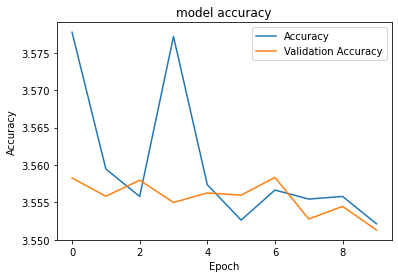

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()